In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: xmfaizan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 122MB/s]

In [2]:
import torch

In [3]:
import torch.nn as nn #nn stands as neural network

In [4]:
from torch.optim import Adam
from torch.utils.data import Dataset, dataloader
from torchsummary import summary #to check the arch

In [5]:
#other common frameworks required
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [7]:
#shows cuda cuz we connected to T4 GPU on collab

In [21]:
df = pd.read_csv("/content/rice-type-classification/riceClassification.csv") # Read the data
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [22]:
df.dropna(inplace = True) # Drop null value cols
df.drop(["id"], axis =1, inplace = True) # Drop Id column (its useless)

In [23]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [24]:
print(df["Class"].value_counts()) # Possible Outputs ( to chek if its numerical)

Class
1    9985
0    8200
Name: count, dtype: int64


In [25]:
#normalisation req

original_df = df.copy() # Creating a copy of the original Dataframe to use to normalize inference

for column in df.columns:
    df[column] = df[column]/data_df[column].abs().max() # max val is 1
df.head()



,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [26]:
#splitting the ds
X = np.array(df.iloc[:,:-1]) # inputs cols
Y = np.array(df.iloc[:, -1]) # output cols


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3) # Create the training split
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5) # Create the validation split

#Training set 70.0 %, Validation set 15.0 %, Testing set 15.0 %

In [28]:
#from torch.utils.data import Dataset, dataloader
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [29]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [30]:
BATCH_SIZE = 16
EPOCHS = 10
HIDDEN_NEURONS = 10
LR = 1e-3

In [33]:
#dataloader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE, shuffle= True)
validation_dataloader = DataLoader(validation_data, batch_size=BATCH_SIZE, shuffle= True)
testing_dataloader = DataLoader(testing_data, batch_size=BATCH_SIZE, shuffle= True)

In [35]:
class RiceModel(nn.Module):
    def __init__(self):

        super(RiceModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x
model = RiceModel().to(device)

In [36]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [37]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr= LR)

In [38]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0
    ## Training Loop
    ## Training and Validation
    for data in train_dataloader:
        # Unpack inputs and labels from the batch
        inputs, labels = data
        # Get model predictions and squeeze to match label dimensions
        prediction = model(inputs).squeeze(1)
        # Calculate loss for the current batch
        batch_loss = criterion(prediction, labels)
        # Accumulate total training loss
        total_loss_train += batch_loss.item()
        # Calculate accuracy for the current batch
        acc = ((prediction).round() == labels).sum().item()
        # Accumulate total training accuracy
        total_acc_train += acc
        # Perform backpropagation to compute gradients, Update model weights and Reset gradients for the next batch
        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    ## Validation
    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)
            # Calculate loss for the current validation batch
            batch_loss = criterion(prediction, labels)
            # Accumulate total validation loss
            total_loss_val += batch_loss.item()
            # Calculate accuracy for the current batch
            acc = ((prediction).round() == labels).sum().item()
             # Accumulate total validation accuracy
            total_acc_val += acc


    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_acc_train_plot.append(round(total_acc_train/(training_data.__len__())*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/(validation_data.__len__())*100, 4))

    print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
    print("="*50)

Epoch no. 1 Train Loss: 0.4068 Train Accuracy: 86.6918 Validation Loss: 0.0446 Validation Accuracy: 98.4971
Epoch no. 2 Train Loss: 0.1243 Train Accuracy: 98.3816 Validation Loss: 0.0160 Validation Accuracy: 98.7170
Epoch no. 3 Train Loss: 0.0619 Train Accuracy: 98.5309 Validation Loss: 0.0104 Validation Accuracy: 98.6804
Epoch no. 4 Train Loss: 0.0460 Train Accuracy: 98.6095 Validation Loss: 0.0084 Validation Accuracy: 98.8636
Epoch no. 5 Train Loss: 0.0397 Train Accuracy: 98.6802 Validation Loss: 0.0076 Validation Accuracy: 98.8270
Epoch no. 6 Train Loss: 0.0369 Train Accuracy: 98.6016 Validation Loss: 0.0071 Validation Accuracy: 98.7903
Epoch no. 7 Train Loss: 0.0357 Train Accuracy: 98.6252 Validation Loss: 0.0068 Validation Accuracy: 98.8270
Epoch no. 8 Train Loss: 0.0344 Train Accuracy: 98.6645 Validation Loss: 0.0066 Validation Accuracy: 98.8270
Epoch no. 9 Train Loss: 0.0339 Train Accuracy: 98.5938 Validation Loss: 0.0067 Validation Accuracy: 98.6804
Epoch no. 10 Train Loss: 0.0

In [39]:
#testing
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  # Loop through each batch in the testing set
  for data in testing_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/X_test.shape[0])*100, 2)}%")

Accuracy Score is: 98.46%


In [40]:
#tweak hyperparameters to chek what combination works on your dataset

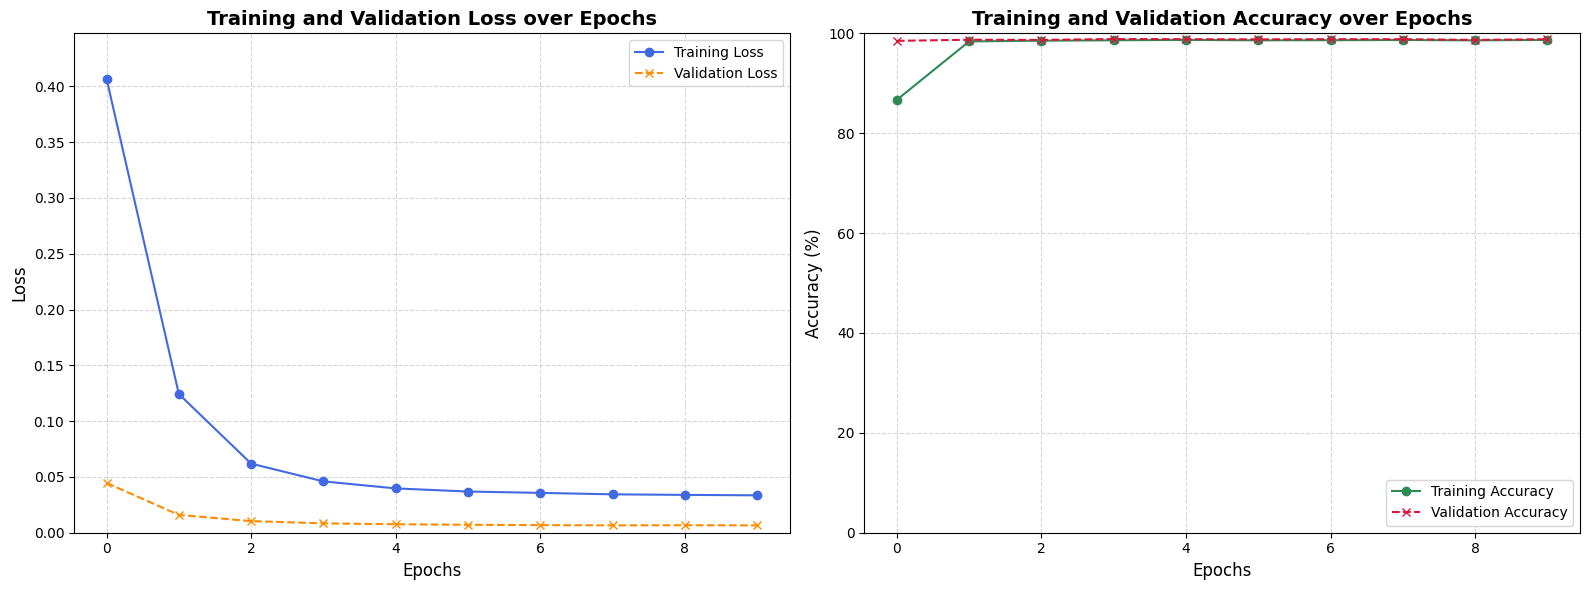

In [42]:
#Visualization
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=100)

# Improve Training and Validation Loss Plot
axs[0].plot(total_loss_train_plot, label='Training Loss', color='royalblue', linestyle='-', marker='o')
axs[0].plot(total_loss_validation_plot, label='Validation Loss', color='darkorange', linestyle='--', marker='x')
axs[0].set_title('Training and Validation Loss over Epochs', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('Loss', fontsize=12)
axs[0].set_ylim([0, max(max(total_loss_train_plot), max(total_loss_validation_plot)) * 1.1])
axs[0].grid(True, linestyle='--', alpha=0.5)
axs[0].legend(loc='upper right', fontsize=10)

# Improve Training and Validation Accuracy Plot
axs[1].plot(total_acc_train_plot, label='Training Accuracy', color='seagreen', linestyle='-', marker='o')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy', color='crimson', linestyle='--', marker='x')
axs[1].set_title('Training and Validation Accuracy over Epochs', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('Accuracy (%)', fontsize=12)
axs[1].set_ylim([0, 100])
axs[1].grid(True, linestyle='--', alpha=0.5)
axs[1].legend(loc='lower right', fontsize=10)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

In [44]:
#Inference
area = float(input("Area: "))/original_df['Area'].abs().max()
MajorAxisLength = float(input("Major Axis Length: "))/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = float(input("Minor Axis Length: "))/original_df['MinorAxisLength'].abs().max()
Eccentricity = float(input("Eccentricity: "))/original_df['Eccentricity'].abs().max()
ConvexArea = float(input("Convex Area: "))/original_df['ConvexArea'].abs().max()
EquivDiameter = float(input("EquivDiameter: "))/original_df['EquivDiameter'].abs().max()
Extent = float(input("Extent: "))/original_df['Extent'].abs().max()
Perimeter = float(input("Perimeter: "))/original_df['Perimeter'].abs().max()
Roundness = float(input("Roundness: "))/original_df['Roundness'].abs().max()
AspectRation = float(input("AspectRation: "))/original_df['AspectRation'].abs().max()

my_inputs = [area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]

print("="*20)
model_inputs = torch.Tensor(my_inputs).to(device)
prediction = (model(model_inputs))
print(prediction)
print("Class is: ", round(prediction.item()))


Area: 6000
Major Axis Length: 150
Minor Axis Length: 41
Eccentricity: 33
Convex Area: 15
EquivDiameter: 50
Extent: 121
Perimeter: 3333
Roundness: 657
AspectRation: 25
tensor([0.], device='cuda:0', grad_fn=<SigmoidBackward0>)
Class is:  0


In [45]:
# learning from Learn PyTorch in 5 Projects – Tutorial Youtube Video by freeCodeCamp.org